<a href="https://www.kaggle.com/code/vtrackstar/google-data-analytics-capstone-project-nba?scriptVersionId=194304787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Google Data Analytics Certification Case Study - Identifying NBA Scoring Talent
## Ask
* **What type of company does your client represent, and what are they asking you to accomplish?**
    * National Basketball Association ownership groups
    * They are asking us to perform analytics based on statistical league history to predict future outcomes. This specific project is to answer the question of, "Is it likely that you can identify a highly efficient scorer outside of the lottery?"
* **What are the key factors involved in the business task you are investigating?**
    * The key factors involved in analyzing the relationship between a player's draft position and their effectiveness as a scorer are the draft position itself and various scoring metrics such as points per game (PPG) and true shooting percentage (TS%)
* **What type of data will be appropriate for your analysis?**
    * Historical NBA player statistical data going back to 1950
* **Where will you obtain that data?**
    * Public Kaggle dataset
* **Who is your audience, and what materials will help you present to them effectively?**
    * NBA general managers, coaches, and ownership groups
    * A document highlighting the final analysis of the project

## Prepare
* **Where is your data located?**
    * In locally uploaded csv files provided by Kaggle
* **How is the data organized?**
    * In a csv with columns and rows and multiple tables
* **Are there issues with bias or credibility in this data? Does your data ROCCC?**
    * The data is reliable, organized, consistent, complete, and current
* **How are you addressing licensing, privacy, security, and accessibility?**
    * The data is readily available via a public data-sharing website, Kaggle.
* **How did you verify the data’s integrity?**
    * By checking the data during pre-cleaning and cleaning stage
* **How does it help you answer your question?**
    * This data provides me the historical data needed to make predictions
* **Are there any problems with the data?**
    * Some of the columns need to be adjusted, as some player positions are listed under multiple categories


## Process
* **What tools are you choosing and why?**
    * Using Kaggle as it allows me to create a Notebook that can be shared
* **What steps have you taken to ensure that your data is clean?**
    * Gone through the relevant columns to ensure no missing or error values
* **How can you verify that your data is clean and ready to analyze?**
    * By checking for certain parameters in my data
* **Have you documented your cleaning process so you can review and share those results?**
    * Yes, through code comments detailing the step by step process


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Load the data locally
file_path = '/kaggle/input/nba-players-data/all_seasons.csv'

df = pd.read_csv(file_path)
print(df.columns)

# Filter out all players who played less than 65 games no matter the reason and scored less than an average of 15.0
filtered_df = df[(df['gp'] >= 65) & (df['pts'] >= 15.0)].copy()
print(filtered_df['draft_number'])

# Convert strings to integers in "Draft Position", coercing errors and Undrafted values to NaN
filtered_df['draft_number'] = pd.to_numeric(filtered_df['draft_number'], errors='coerce')

# Replace NaN values with 100 to use numerical sorting function in scatter plot
filtered_df['draft_number'] = filtered_df['draft_number'].fillna(100).astype(int)
print(filtered_df['draft_number'])

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')
7         4
8         1
9         3
18        1
22        2
         ..
12807    28
12811     6
12822     3
12825     3
12839     3
Name: draft_number, Length: 1239, dtype: object
7         4
8         1
9         3
18        1
22        2
         ..
12807    28
12811     6
12822     3
12825     3
12839     3
Name: draft_number, Length: 1239, dtype: int64


## Analyze
* **How should you organize your data to perform analysis on it?**
    * I organized by data into tables with columns and rows as that was how the information was presented to me
* **Has your data been properly formatted?**
    * Yes, a new table with the appropriate columns was created.
* **What surprises did you discover in the data?**
    * My hypothesis was proven correct that the better scorers tend to be drafted higher.
* **What trends or relationships did you find in the data?**
    * There is a relationship where the lower the draft position, the less likely to have a top-right quadrant scorer
* **How will these insights help answer your business questions?**
    * NBA teams who frequently draft outside of the lottery should consider trading for established top-level scorers.

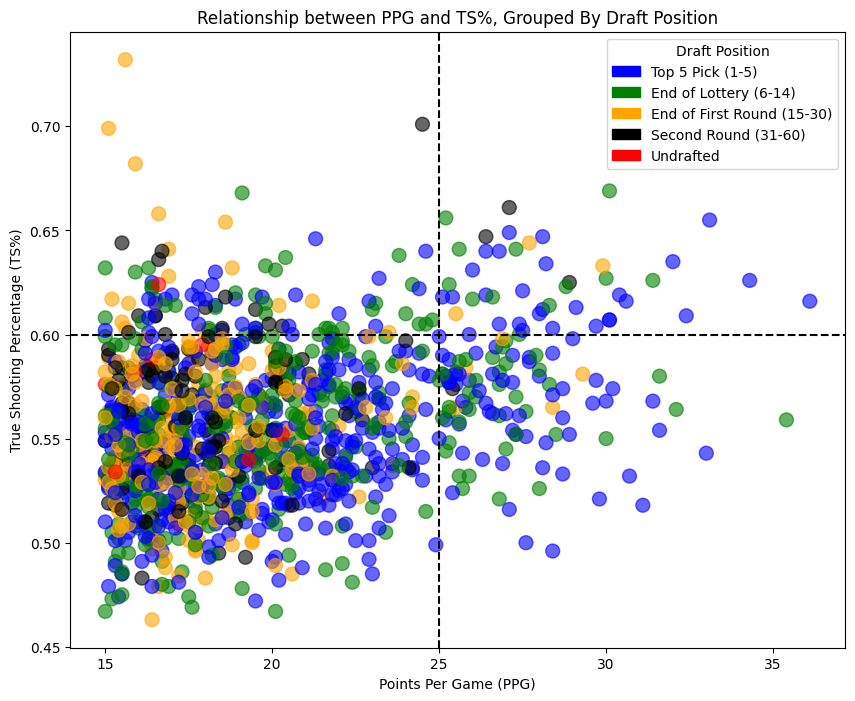

In [2]:
    # Create visualizations based on ratio between Points per Game (pts) and True Shooting Percentage (ts_pct)
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import seaborn as sns

    # Create Colormap for Scatter Plot Based on NBA Draft Position
    # Categories: Top 5 Pick, Rest of Lottery (6-14), End of First (15-30), Second (31-60), Undrafted
    # Define the x and y columns
    x = filtered_df['pts']
    y = filtered_df['ts_pct']

    # Define a dictionary that maps colors to specific text for the legend
    color_to_text_map = {
        'blue': 'Top 5 Pick (1-5)',
        'green': 'End of Lottery (6-14)',
        'orange': 'End of First Round (15-30)',
        'black': 'Second Round (31-60)',
        'red': 'Undrafted'
    }
    # Define the ranges for color coordination
    def get_color(value):
        if value <= 5:
            return 'blue'
        elif 6 <= value < 15:
            return 'green'
        elif 15 <= value < 31:
            return 'orange'
        elif 30 <= value < 61:
            return 'black'
        else:
            return 'red'

    # Apply color based on the range_column
    filtered_df['color'] = filtered_df['draft_number'].apply(get_color)

    # Plotting the scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, c=filtered_df['color'], s=100, alpha=0.6)

    # Adding quadrant lines at specific points
    plt.axhline(y=0.60, color='black', linestyle='--')  # Horizontal line at 25 PPG
    plt.axvline(x=25, color='black', linestyle='--')  # Vertical line at 60% TS

    # Adding labels and title
    plt.xlabel('Points Per Game (PPG)')
    plt.ylabel('True Shooting Percentage (TS%)')
    plt.title('Relationship between PPG and TS%, Grouped By Draft Position')

    # Creating a custom legend based on color and text mapping
    import matplotlib.patches as mpatches
    patches = [mpatches.Patch(color=color, label=text) for color, text in color_to_text_map.items()]
    plt.legend(handles=patches, title="Draft Position")

    # Display the plot
    plt.show()



In [3]:
# Function to determine the quadrant based on PPG and TS%
def determine_quadrant(row):
    if row['pts'] >= 25 and row['ts_pct'] >= 0.60:
        return 'Quadrant 1 (Top-Right)'
    elif row['pts'] < 25 and row['ts_pct'] >= 0.60:
        return 'Quadrant 2 (Top-Left)'
    elif row['pts'] < 25 and row['ts_pct'] < 0.60:
        return 'Quadrant 3 (Bottom-Left)'
    else:
        return 'Quadrant 4 (Bottom-Right)'

# Apply quadrant classification
filtered_df['quadrant'] = filtered_df.apply(determine_quadrant, axis=1)

# Define draft position groups
def get_draft_group(draft_number):
    if draft_number <= 5:
        return 'Top 5 Pick (1-5)'
    elif 6 <= draft_number < 15:
        return 'Rest of Lottery (6-14)'
    elif 15 <= draft_number < 31:
        return 'End of First Round (15-30)'
    elif 31 <= draft_number < 61:
        return 'Second Round (31-60)'
    else:
        return 'Undrafted'

# Apply draft position group classification
filtered_df['draft_group'] = filtered_df['draft_number'].apply(get_draft_group)

# Calculate the count of each draft position group in each quadrant
def calculate_counts(filtered_df):
    # Calculate the count of each draft position group in each quadrant
    quadrant_counts = filtered_df.groupby(['draft_group', 'quadrant']).size().unstack(fill_value=0)
    
    # Calculate the total count of players in each draft position group
    total_counts = filtered_df['draft_group'].value_counts()
    
    # Combine total counts with quadrant counts
    results = pd.concat([total_counts.rename('Total Players'), quadrant_counts], axis=1)
    
    return results

# Calculate and print counts
results = calculate_counts(filtered_df)

# Print the results in a table format
print("Total Counts for Each Draft Position Group in Each Quadrant:")
print(results)


Total Counts for Each Draft Position Group in Each Quadrant:
                            Total Players  Quadrant 1 (Top-Right)  \
draft_group                                                         
Top 5 Pick (1-5)                      484                      28   
Rest of Lottery (6-14)                378                      12   
End of First Round (15-30)            238                       3   
Second Round (31-60)                  125                       3   
Undrafted                              14                       0   

                            Quadrant 2 (Top-Left)  Quadrant 3 (Bottom-Left)  \
draft_group                                                                   
Top 5 Pick (1-5)                               35                       361   
Rest of Lottery (6-14)                         36                       290   
End of First Round (15-30)                     17                       213   
Second Round (31-60)                           14           

In [4]:
# Function to determine the quadrant based on PPG and TS%
def determine_quadrant(row):
    if row['pts'] >= 25 and row['ts_pct'] >= 0.60:
        return 'Quadrant 1 (Top-Right)'
    elif row['pts'] < 25 and row['ts_pct'] >= 0.60:
        return 'Quadrant 2 (Top-Left)'
    elif row['pts'] < 25 and row['ts_pct'] < 0.60:
        return 'Quadrant 3 (Bottom-Left)'
    else:
        return 'Quadrant 4 (Bottom-Right)'

# Apply quadrant classification
filtered_df['quadrant'] = filtered_df.apply(determine_quadrant, axis=1)

# Define draft position groups
def get_draft_group(draft_number):
    if draft_number <= 5:
        return 'Top 5 Pick (1-5)'
    elif 6 <= draft_number < 15:
        return 'Rest of Lottery (6-14)'
    elif 15 <= draft_number < 31:
        return 'End of First Round (15-30)'
    elif 31 <= draft_number < 61:
        return 'Second Round (31-60)'
    else:
        return 'Undrafted'

# Apply draft position group classification
filtered_df['draft_group'] = filtered_df['draft_number'].apply(get_draft_group)

# Calculate the percentage of each draft position group in each quadrant
def calculate_percentage(filtered_df):
    # Calculate the count of each draft position group in each quadrant
    quadrant_counts = filtered_df.groupby(['draft_group', 'quadrant']).size().unstack(fill_value=0)
    
    # Calculate the total count of players in each draft position group
    total_counts = filtered_df['draft_group'].value_counts()
    
    # Calculate the percentage of players in each quadrant based on draft_group
    percentages = quadrant_counts.divide(total_counts, axis=0) * 100
    
    # Rename the columns to indicate percentages
    percentages.columns = [f'{col} (%)' for col in percentages.columns]
    
    return percentages

# Calculate and print percentages
results = calculate_percentage(filtered_df)

# Print the results in a table format
print("Percentage of Draft Position Group in Each Quadrant:")
print(results)


Percentage of Draft Position Group in Each Quadrant:
                            Quadrant 1 (Top-Right) (%)  \
draft_group                                              
End of First Round (15-30)                    1.260504   
Rest of Lottery (6-14)                        3.174603   
Second Round (31-60)                          2.400000   
Top 5 Pick (1-5)                              5.785124   
Undrafted                                     0.000000   

                            Quadrant 2 (Top-Left) (%)  \
draft_group                                             
End of First Round (15-30)                   7.142857   
Rest of Lottery (6-14)                       9.523810   
Second Round (31-60)                        11.200000   
Top 5 Pick (1-5)                             7.231405   
Undrafted                                    7.142857   

                            Quadrant 3 (Bottom-Left) (%)  \
draft_group                                                
End of First Round (

In [5]:
# Function to determine the quadrant based on PPG and TS%
def determine_quadrant(row):
    if row['pts'] >= 25 and row['ts_pct'] >= 0.60:
        return 'Quadrant 1 (Top-Right)'
    elif row['pts'] < 25 and row['ts_pct'] >= 0.60:
        return 'Quadrant 2 (Top-Left)'
    elif row['pts'] < 25 and row['ts_pct'] < 0.60:
        return 'Quadrant 3 (Bottom-Left)'
    else:
        return 'Quadrant 4 (Bottom-Right)'

# Apply quadrant classification
filtered_df['quadrant'] = filtered_df.apply(determine_quadrant, axis=1)

# Define draft position groups
def get_draft_group(draft_number):
    if draft_number <= 5:
        return 'Top 5 Pick (1-5)'
    elif 6 <= draft_number < 15:
        return 'Rest of Lottery (6-14)'
    elif 15 <= draft_number < 31:
        return 'End of First Round (15-30)'
    elif 31 <= draft_number < 61:
        return 'Second Round (31-60)'
    else:
        return 'Undrafted'

# Apply draft position group classification
filtered_df['draft_group'] = filtered_df['draft_number'].apply(get_draft_group)

# Calculate the percentage of each draft position group in each quadrant
def calculate_percentages(filtered_df):
    # Calculate the count of each draft position group in each quadrant
    quadrant_counts = filtered_df.groupby(['draft_group', 'quadrant']).size().unstack(fill_value=0)
    
    # Calculate the total count of players in each quadrant
    quadrant_totals = filtered_df['quadrant'].value_counts()
    
    # Calculate the percentage of each draft position group in each quadrant
    percentages = quadrant_counts.divide(quadrant_totals, axis=1) * 100
    
    # Rename the columns to indicate percentages
    percentages.columns = [f'{col} (%)' for col in percentages.columns]
    
    return percentages

# Calculate and print percentages
results = calculate_percentages(filtered_df)

# Print the results in a table format
print("Percentage of Quadrant Each Draft Position Group Occupies:")
print(results)

Percentage of Quadrant Each Draft Position Group Occupies:
                            Quadrant 1 (Top-Right) (%)  \
draft_group                                              
End of First Round (15-30)                    6.521739   
Rest of Lottery (6-14)                       26.086957   
Second Round (31-60)                          6.521739   
Top 5 Pick (1-5)                             60.869565   
Undrafted                                     0.000000   

                            Quadrant 2 (Top-Left) (%)  \
draft_group                                             
End of First Round (15-30)                  16.504854   
Rest of Lottery (6-14)                      34.951456   
Second Round (31-60)                        13.592233   
Top 5 Pick (1-5)                            33.980583   
Undrafted                                    0.970874   

                            Quadrant 3 (Bottom-Left) (%)  \
draft_group                                                
End of First R

## Share
* **Were you able to answer the business question?**
    * Not completely, as there are factors such as the individual team's player development staff, the public exposure of a particular player as it relates to the country or system they currently play in, and whether or not the player has any contributing skills aside from purely scoring.
* **What story does your data tell?**
    * That over 86% of the most efficient high volume scorers in league history were drafted in the lottery and less than 1 out of 4 players drafted outside of the lottery develop into high volume scorers. 
* **How do your findings relate to your original question?**
    * The odds of a high volume scorer being discovered outside of the lottery is highly improbable.
* **Who is your audience? What is the best way to communicate with them?**
    * NBA ownership and GMs, and the best way to communicate with them is by using actionable language as they have to incorporate these decisions with the wishes of the team's coaching staff.
* **Can data visualization help you share your findings?**
    * Visualization helps my audience quickly understand the proportion of players who fall into each category of scorer, rather than looking at raw data and numbers, which can be overwhelming.

In [6]:
filtered_df.to_csv('filtered_data.csv', index=False)

### Tableau Dashboard Visualization
[Click to View Tableau Interactive Charts](https://public.tableau.com/app/profile/bryan.louissaint/viz/GoogleDACert-NBA/Dashboard1#1)
![Visualization of Total Count of Players in Each Quadrant Grouped By Draft Group](https://i.postimg.cc/hvqJYYC2/Total-Count-of-Players-in-Each-Quadrant.png)

## Act
* **What is your final conclusion based on your analysis?**  
    * Your odds of identifying an elite scorer diminish as your draft position moves later in the draft.
* **How could your team and business apply your insights?**  
    * By analyzing their current team structure to determine whether they're a lottery team, middle of the road play-in team, or an elite team consistently making deep play-off runs.
* **What next steps would you or your stakeholders take based on your findings?**  
    * Stakeholders would now be able to identify their team's standing in relation to the rest of the league, take into account the upcoming NBA draft classes, and determine if trading for an elite scorer is more plausible then spending resources on the scouting department in search for one.
* **Is there additional data you could use to expand on your findings?**  
    * A list containing player accolades, such as individual regular season MVPs awards, NBA championships, or All-NBA team selections in order to determine if it is possible to draft an MVP-caliber player outside of the lottery, as scoring is only a facet of what makes an elite NBA player.